# HOUSE PRICE PREDICTION 


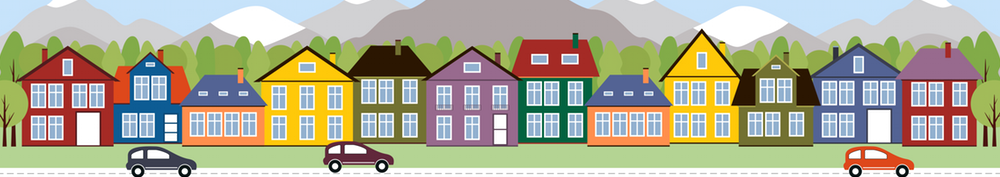

###### DESCRIPTION :
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

###### Analysis Task :
* Predict the sales price for each house. For each Id in the test set and predict the value of the SalePrice variable. 

### Importing the Library

In [1]:
# Importing Python library for reading, writing, and perform basic operations
import numpy as np
import pandas as pd

# Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [2]:
df_train = pd.read_csv('C:/Users/Administrator/Desktop/House_price/train.csv')
df_test = pd.read_csv('C:/Users/Administrator/Desktop/House_price/test.csv')

### Exploring the dataset

In [3]:
# Checking the shape of a dataset
print('Shape :')
print('Total number of rows and columns in training data : ', df_train.shape)
print('Total number of rows and columns in Test data     : ', df_test.shape)

Shape :
Total number of rows and columns in training data :  (1460, 81)
Total number of rows and columns in Test data     :  (1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [7]:
#Checking for datatypes & count of missing values for training and test data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

###### Checking the percentage of missing data for each feature which will give a better idea and select how to handle missing values before preparing the dataset for the model

In [9]:
# Training data
Total_tr = df_train.isnull().sum()
percent_tr = (df_train.isnull().sum() / df_train.isnull().count())
missing_data_tr = pd.concat([Total_tr, round(percent_tr*100, 2)], axis=1, keys=['Total', 'Percent'])

#considering missing data > 5%
result_tr=missing_data_tr[percent_tr>0.05] 
result_tr.sort_values('Percent',ascending=False)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [10]:
# Test data
Total_tt = df_test.isnull().sum()
percent_tt = (df_test.isnull().sum()/df_test.isnull().count())
missing_data_tt = pd.concat([Total_tt, round(percent_tt*100,2)], axis=1, keys=['Total', 'Percent'])

#considering missing data > 5%
result_tt=missing_data_tt[percent_tt > 0.05]
result_tt.sort_values('Percent',ascending=False)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageFinish,78,5.35
GarageQual,78,5.35
GarageCond,78,5.35


###### Checking for skewness and Kurtosis of the target variable

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


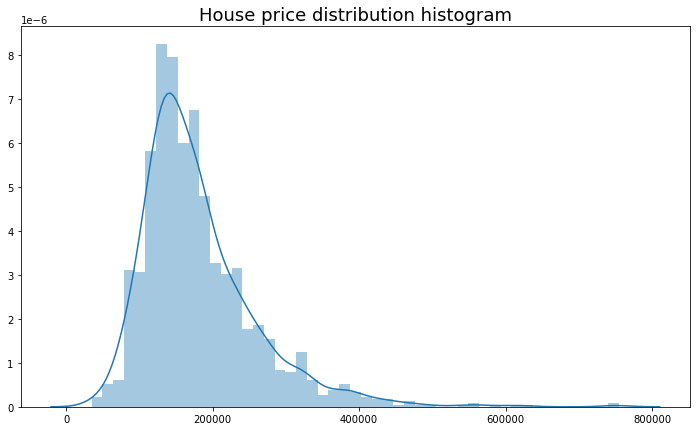

In [12]:
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

plt.figure(figsize=(12, 7))
sns.distplot(df_train['SalePrice']).set(ylabel=None, xlabel=None)
plt.title('House price distribution histogram', fontsize=18)
plt.show()

In [13]:
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


###### As we can see, we have a positive skew, we must fix it

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


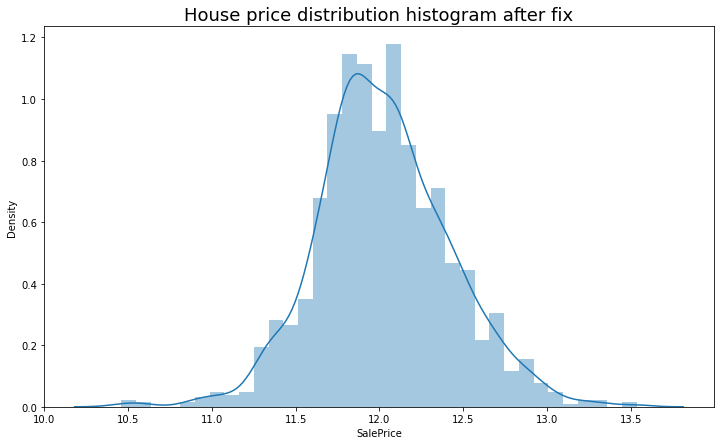

In [14]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
plt.figure(figsize=(12, 7))

sns.distplot(df_train['SalePrice'])
plt.title('House price distribution histogram after fix', fontsize=18)
plt.show()

###### After adjusting the positive skew, now we need to check for correlation of the features with the target variable through a heatmap.

<AxesSubplot:>

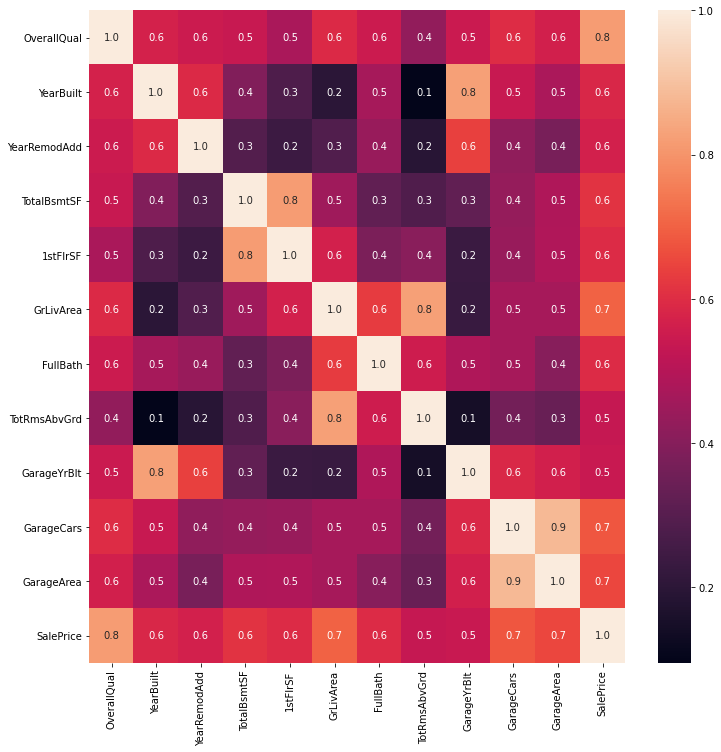

In [15]:
Correlation=df_train.corr()
high_corr=Correlation.index[Correlation['SalePrice'] > 0.5]
plt.figure(figsize=(12,12))
sns.heatmap(df_train[high_corr].corr(),fmt= '.1f',annot=True)

* This correlation heat map shows that 'OverQual'has highest correlation of 0.8 with the 'Saleprice'.
* Similarly,'GarageCars' & 'GarageArea' have a correlation of 0.7 with the 'Salesprice' and they are also sharing a correlation of 0.9 with each other.
* 'TotalBsmtSF' & '1stFlrSF' have a correlation of 0.6 with the 'Saleprice' and they are also sharing a correlation with each other is 0.8 which also high. This means, it might be a good idea to add the '1stFlrSF' to 'TotalBsmtSF' for convenience.
* Finally, 'TotRmsAbvGrd' & 'GrLivArea' have a correlation of 0.5 with the 'SalePrice' and have 0.8 correlation with each other.

In [16]:
SalePrice = round(Correlation['SalePrice'].sort_values(ascending=False), 2)
SalePrice

SalePrice        1.00
OverallQual      0.82
GrLivArea        0.70
GarageCars       0.68
GarageArea       0.65
TotalBsmtSF      0.61
1stFlrSF         0.60
FullBath         0.59
YearBuilt        0.59
YearRemodAdd     0.57
GarageYrBlt      0.54
TotRmsAbvGrd     0.53
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.37
LotFrontage      0.36
WoodDeckSF       0.33
OpenPorchSF      0.32
2ndFlrSF         0.32
HalfBath         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.21
ScreenPorch      0.12
PoolArea         0.07
MoSold           0.06
3SsnPorch        0.05
BsmtFinSF2       0.00
BsmtHalfBath    -0.01
Id              -0.02
MiscVal         -0.02
OverallCond     -0.04
YrSold          -0.04
LowQualFinSF    -0.04
MSSubClass      -0.07
KitchenAbvGr    -0.15
EnclosedPorch   -0.15
Name: SalePrice, dtype: float64

###### We can now explore the top 6 features that have highest correlation with the 'SalePrice'

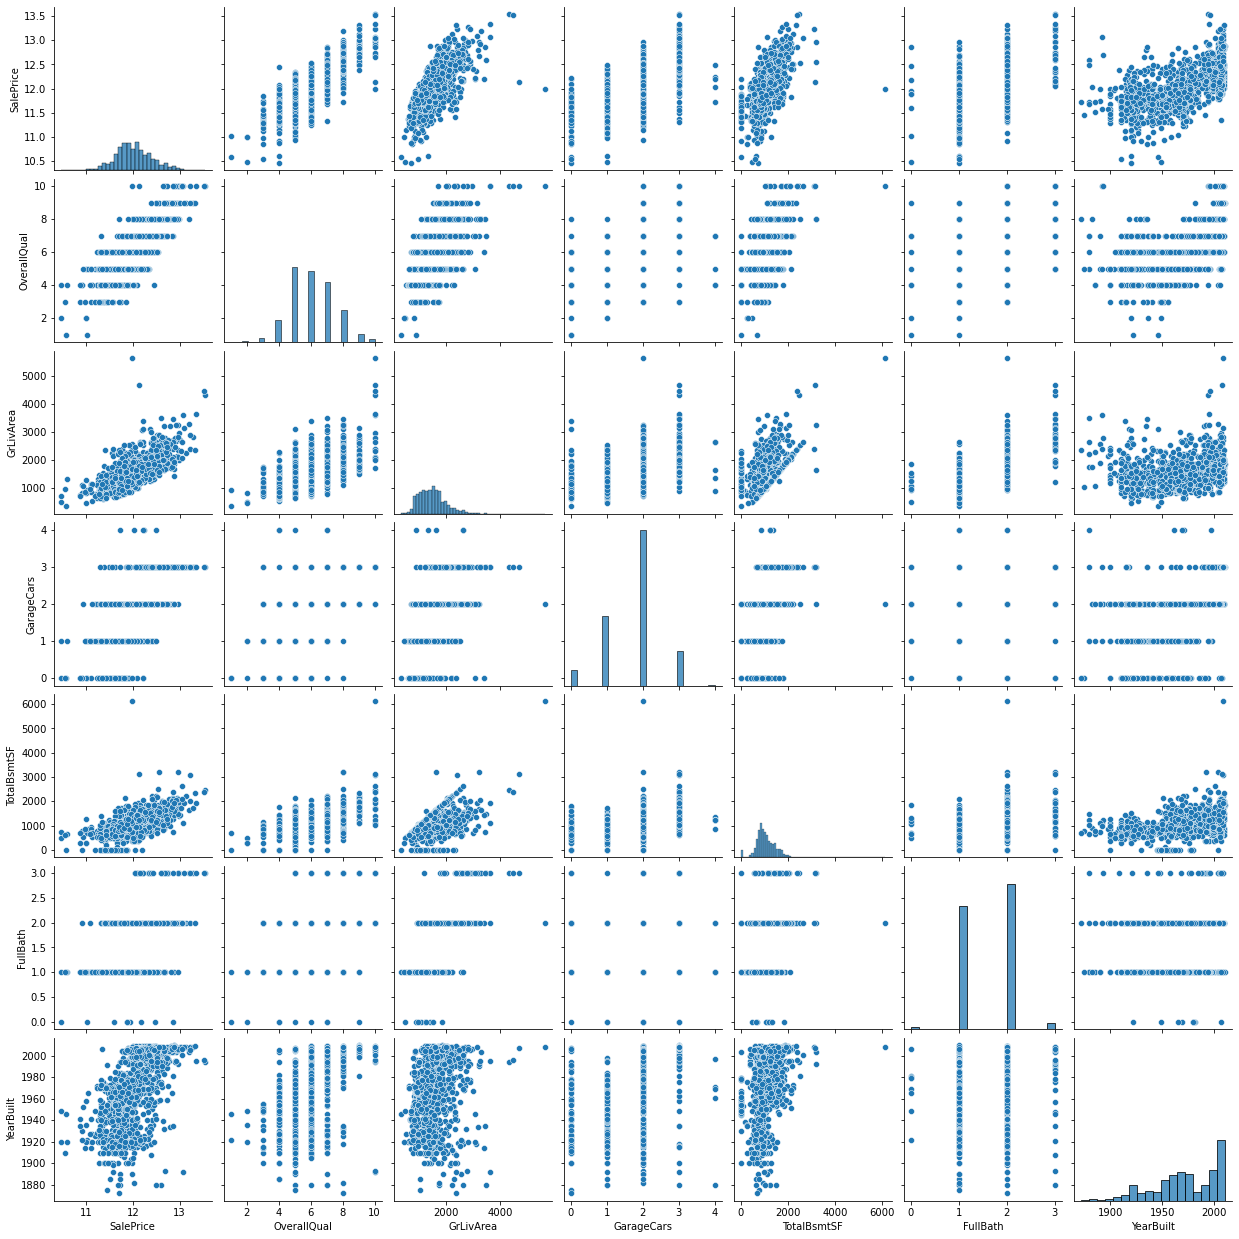

In [17]:
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[features])
plt.show()

###### Now,we know important features and their effect on the target variable.

In [18]:
# Separate the SalePrice column from the train dataset :

y_train = df_train['SalePrice']

# Combine training and testing datasets
df_mg = [df_train, df_test]
mg_data = pd.concat(df_mg, sort=False)
mg_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [19]:
# Droping 'Id' & 'SalePrice' :
mg_data = mg_data.drop(['Id', 'SalePrice'], axis=1)
mg_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [20]:
# Finding missing values
Total = mg_data.isnull().sum().sort_values(ascending=False)  
percent = round((mg_data.isnull().sum() / mg_data.isnull().count())*100,2).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageYrBlt,159,5.45
GarageFinish,159,5.45
GarageQual,159,5.45
GarageCond,159,5.45


None of the above features with missing values are important features as their correlation is not > 0.5 as per the heatmap, so it's possible to delete them without affecting the prediction accuracy.

In [21]:
# Drop the columns whose missing values is greather than 5 percent.
mg_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
mg_data.tail(15)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1444,20,NaN,31250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,135,0,0,0,0,5,2006,WD,Normal
1445,90,RM,7020,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,48,0,0,0,0,0,11,2006,WD,Normal
1446,160,RM,2665,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,5,2006,WD,Normal
1447,20,RL,10172,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,120,0,0,0,0,0,10,2006,WD,Normal
1448,90,RL,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,...,0,0,0,0,0,0,3,2006,WD,Normal
1449,180,RM,1470,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,4,2006,WD,Normal
1450,160,RM,1484,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,5,2006,WD,Normal
1451,20,RL,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,160,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1453,160,RM,1526,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,34,0,0,0,0,0,6,2006,WD,Normal


In [22]:
# Checking remaining total missing values 
total = mg_data.isnull().sum().sort_values(ascending=False)
total.head(18)

MSZoning        4
Functional      2
BsmtFullBath    2
BsmtHalfBath    2
Utilities       2
BsmtFinSF2      1
Exterior2nd     1
GarageCars      1
GarageArea      1
BsmtFinSF1      1
BsmtUnfSF       1
Exterior1st     1
TotalBsmtSF     1
Electrical      1
SaleType        1
KitchenQual     1
HalfBath        0
FullBath        0
dtype: int64

###### Filling the missing data.

We fill the categorical data first and then the numerical data.

Categorical missing values can be easily replaced with the most frequently occuring value i.e. mode.

Numerical missing values can either be replaced by mean or by 0. Since these features do not have a strong correlation with target variable, we replace the missing values with 0.

It is also possible to do the same with a SimpleImputer class from scikit-learn but here we use fillna to handle missing values

In [23]:
# Categorical data
categorical_missed = ['Exterior1st',
                      'Exterior2nd',
                      'SaleType',
                      'MSZoning',
                      'Electrical',
                      'KitchenQual',
                      'Utilities',
                      'Functional'
                     ]

for feature in categorical_missed:
    mg_data[feature].fillna(mg_data[feature].mode()[0], inplace=True)
mg_data.tail(15)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1444,20,RL,31250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,135,0,0,0,0,5,2006,WD,Normal
1445,90,RM,7020,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,48,0,0,0,0,0,11,2006,WD,Normal
1446,160,RM,2665,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,5,2006,WD,Normal
1447,20,RL,10172,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,120,0,0,0,0,0,10,2006,WD,Normal
1448,90,RL,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,...,0,0,0,0,0,0,3,2006,WD,Normal
1449,180,RM,1470,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,4,2006,WD,Normal
1450,160,RM,1484,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,5,2006,WD,Normal
1451,20,RL,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,160,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1453,160,RM,1526,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,34,0,0,0,0,0,6,2006,WD,Normal


In [24]:
# Numerical data
numerical_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numerical_missed:
    mg_data[feature].fillna(0, inplace=True)
mg_data.tail(15)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1444,20,RL,31250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,135,0,0,0,0,5,2006,WD,Normal
1445,90,RM,7020,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,48,0,0,0,0,0,11,2006,WD,Normal
1446,160,RM,2665,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,5,2006,WD,Normal
1447,20,RL,10172,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,120,0,0,0,0,0,10,2006,WD,Normal
1448,90,RL,11836,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,...,0,0,0,0,0,0,3,2006,WD,Normal
1449,180,RM,1470,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,4,2006,WD,Normal
1450,160,RM,1484,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,5,2006,WD,Normal
1451,20,RL,13384,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,0,5,2006,WD,Normal
1452,160,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,12,2006,WD,Abnorml
1453,160,RM,1526,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,34,0,0,0,0,0,6,2006,WD,Normal


In [25]:
mg_data.isnull().sum().sort_values(ascending=False).iloc[:10]
mg_data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,32,0,0,0,0,700,7,2006,WD,Normal


All the missing values have been fixed 

###### Since we fixed the skewness in target variable, we also need to fix the skewness in the other features

In [26]:
from scipy.stats import skew

In [27]:
#numerical features
num_features = mg_data.dtypes[mg_data.dtypes != 'object'].index
skewed_features = mg_data[num_features].apply(lambda x: skew(x)).sort_values(ascending=False)
h_skew = skewed_features[abs(skewed_features) > 0.5]
print (h_skew)


MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64


Next, we will add columns 'TotalBsmtSF','1stFlrSF' and '2ndFlrSF' to create a new column 'totalSF' based on the observations from the correlation heatmap.

In [28]:
# New column
mg_data['totalSF'] = mg_data['TotalBsmtSF'] + mg_data['1stFlrSF'] + mg_data['2ndFlrSF']
mg_data['totalSF']

0       2566.0
1       2524.0
2       2706.0
3       2473.0
4       3343.0
         ...  
1454    1638.0
1455    1638.0
1456    2448.0
1457    1882.0
1458    2996.0
Name: totalSF, Length: 2919, dtype: float64

##### Converting the categorical entries to numerical
* This we can achieve easily using the pandas get_dummies() function which replaces categorical columns with their one-hot representations.

In [29]:
mg_data = pd.get_dummies(mg_data)
mg_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,4,7,1970,1970,0.0,0.0,546.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,1894,4,5,1970,1970,252.0,0.0,294.0,546.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,20000,5,7,1960,1996,1224.0,0.0,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets.

x_train = mg_data[:len(y_train)]
#x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,train_size=0.8, test_size=0.2, random_state=1)

In [31]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1168, 221), (292, 221), (1168,), (292,))

### Applying ML algorithm for prediction

In [33]:
# Import required libraries and packages
from sklearn.linear_model import LinearRegression

# Linear regression module

regr = LinearRegression() 
regr.fit(x_train, y_train)

train_score = regr.score(x_train, y_train)

# Print training score
print("training score: ", train_score)

# Making predictions on test data

y_pred=regr.predict(x_test)  
test_score = regr.score(x_test, y_pred)
print("test score:", test_score )



training score:  0.9423814649419161
test score: 1.0


In [34]:
# Import required libraries and packages

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

print ('Mean Absolute Error  is   :', mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error: is    :', mean_squared_error(y_test, y_pred))
print ('Root Mean Square Error is :', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2_score is               :' , r2_score(y_test,y_pred))

Mean Absolute Error  is   : 0.09397114320831466
Mean Squared Error: is    : 0.01916482481499153
Root Mean Square Error is : 0.1384370789022635
r2_score is               : 0.8895738770558752


Text(0.5, 1.0, 'Linear Regression Model')

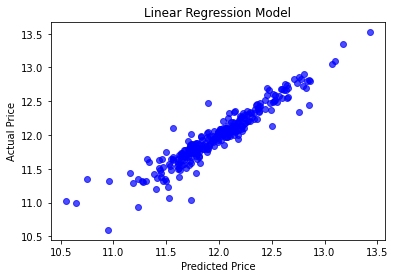

In [35]:
# Scatter plot for Linear Regression Model

plt.scatter(y_pred, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [36]:
# Import required libraries and packages
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Module
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

train_sc = regressor.score(x_train, y_train)

# Print training score
print("training score: ", train_sc)

# Making predictions on test data

y_pre = regressor.predict(x_test)
test_sc = regressor.score(x_test, y_pre)
print("test score:", test_sc )

training score:  0.9999909915251806
test score: 1.0


In [37]:

print ('Mean Absolute Error is    :', mean_absolute_error(y_test, y_pre))
print ('Mean Squared Error: is    :', mean_squared_error(y_test, y_pre))
print ('Root Mean Square Error is :', np.sqrt(mean_squared_error(y_test, y_pre)))
print('r2_score is               :' , r2_score(y_test,y_pre))

Mean Absolute Error is    : 0.143854576308622
Mean Squared Error: is    : 0.04297853902144946
Root Mean Square Error is : 0.20731266006071472
r2_score is               : 0.7523612409841097


Text(0.5, 1.0, 'Decision Tree Model')

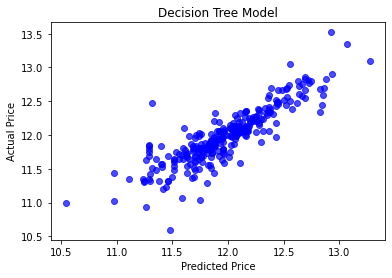

In [38]:
# Scatter plot for Decision Tree Model

plt.scatter(y_pre, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Decision Tree Model')

In [39]:
# Import required libraries and packages
from sklearn.ensemble import RandomForestRegressor

# Random Forest Module
model = RandomForestRegressor(n_estimators= 200, random_state=0)
model.fit(x_train, y_train)

train_score = model.score(x_train, y_train)

# Print training score
print("training score: ", train_score)

# Making predictions on test data

preds = model.predict(x_test)  
test_score = model.score(x_test, preds)
print("test score:", test_score )

training score:  0.9813864490368621
test score: 1.0


In [40]:

print ('Mean Absolute Error is    :', mean_absolute_error(y_test, preds))
print ('Mean Squared Error: is    :', mean_squared_error(y_test, preds))
print ('Root Mean Square Error is :', np.sqrt(mean_squared_error(y_test, preds)))
print('r2_score is               :' , r2_score(y_test, preds))

Mean Absolute Error is    : 0.09426681462786173
Mean Squared Error: is    : 0.01864544374131563
Root Mean Square Error is : 0.13654832017024462
r2_score is               : 0.8925665075051619


Text(0.5, 1.0, 'Random Forest Model')

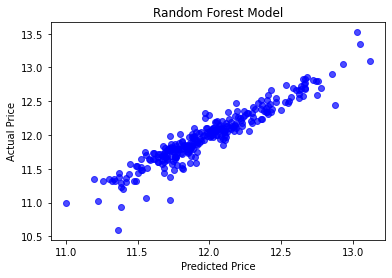

In [41]:
# Scatter plot for Random Forest Model

plt.scatter(preds, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest Model')

In [42]:
# Prediction based on Linear Regression Model

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
258,12.352339,12.268120
267,12.097936,12.143266
288,11.711785,11.622827
649,11.344519,11.233733
1233,11.863589,11.768495
...,...,...
163,11.544434,11.531207
47,12.428019,12.384330
1432,11.074436,11.529162
98,11.326608,11.308334
